# Clustering means finding a group with similar feature neighbour.

# K - Means Clustering - 

help find  category in data. 
It hekps to find how to identify how many groups can create from data.

Steps - 

-Choose the no K of cluster
-Select a random K point which is centroid of data. 
-Assign each data point to the closest centroid.
-Compute and place new centroid of each cluster.
-reassign each data point to the new closest centroid
-repeat the process till every data point comes under certain cluster.

WCSS - Within Cluster Sum of Squares


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [6]:
Data = pd.read_csv("mall_customers.csv")

In [15]:
Data

# Spending score is point that mall given to client based on some criteria. closer to 100 points means more spent done by client.
# categorised client segment based on their annual income and spending score

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
Data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
Data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
X = Data.iloc[:, [3,4]].values

# created array with the variable (annual income, spending score)

In [20]:
X



array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [22]:
# Now will do K- means clustering for finding optimal no of clusters using Elbow method

In [24]:
from sklearn.cluster import KMeans # import kmeans class from scikit learn.

Text(0, 0.5, 'WCSS')

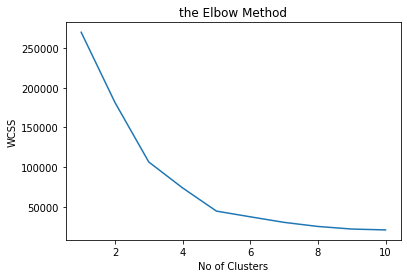

In [29]:
# creating for loop for creating wcss for 10 no of cluster

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# in Kmeans class fill several parameter - n_cluster = no of cluster will be 10, init = kmeans++ initalization kmeans method choosen, max_iter decide 300 no which is default no. n_init = no of time k algoraithm is run with different inital centroid.
# now in kmeans object fit the method .
# now calulacte the within sum of square which is depend on the list WCSS.
# wcss another name is inertia. in scikit learn library inertia attribute that computes WCSS.
# for computing WCSS appened kmeans.inertia code.
# now plot elbow ethod graph

plt.plot(range(1,11), wcss) # in x taken no of cluster, in y taken WCSS
plt.title("the Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")



In [31]:
# as clearly seen in above elbow graph that no of cluster is - "5"
# which we can take for applying our K-menas algorithm

In [32]:
# Applying kmeans to the Dataset

In [33]:
kmeans = KMeans(n_clusters = 5, random_state= 0)
# now use fit predict method which define every data belong to which cluster
y_kmeans = kmeans.fit_predict(X)

In [34]:
y_kmeans # this shows cluster detail based on entire data. starting from o to 4 there are 5 cluster.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [37]:
# Visualization of cluster
# scatter plot use for showing cluster graph
# in scatter plot function x = will take cluster 0 with index 1 which is name as 0.choose size as 100, color as red

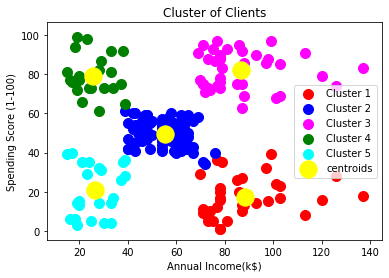

In [39]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 100, c = 'red', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 100, c = 'blue', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 100, c = 'magenta', label = "Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s= 100, c = 'green', label = "Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s= 100, c = 'cyan', label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c= 'yellow', label = 'centroids')
plt.title("Cluster of Clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

In [42]:
# can see our data is beautifully divided into 5 cluster.
# ASSUmptions based on Spending score and annual Income
# Cluster1 - "high income and low spending" can say "Careful Customer"
# Cluster2 - "medium income and medium soending" can say "Standard customer"
# cluster 3 - "High Income and High spending" can be "target customer"
# cluster 4 - "Low income and High spending" can say "Careless customer"
# cluster 5 - "low income and low spwnding" can say "Sensible customer"





# Hierarichal Clustering

Two types -

# Agglomerative (Bottom up Approach)
# Divisive (Top to Bottom)

Agglomerative Approach - 

Steps -

1- Make each data point a single point cluster - means N no of cluster

2- take 2 closest data point and make them one cluster. N -1 

3- take 2 closest cluster make them one cluster N-2

4- repeat till we have only one cluster remaining.

So basically collecting all data point in one cluster. bottom up approach


# Distance between Cluster method
we need to define which method need to choose for taking 2 data point and making as cluster.

Option1 - Closest Points

Option2 - Furthest Points

Option3 - Average Distance

Option4 - Distance between centroids

# DENDOGRAM 

Its kind of memory of every step taken to create cluster one by one.

In [44]:
# using the dendogram to find the optimal no of cluster

In [45]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distance')

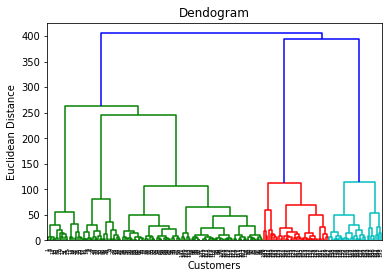

In [46]:
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")

# in dendogram choose linkeage alogaritum itself of hieraricahl clustering so choose sch.linkeage, in linkeage specify X data, 
# as second parameter method "Ward" it tries to minimise the distance the of each cluster.

In [47]:
# at th ebottom we have all customers
# this dendogram shows all cluster which is find.
# the vertical line explain distance between cluster "Euclideian Distance"
# without crossing any horizontal line i will find the base line which decide no of cluster choosen.
# can see green vertical line in mid start from here and blue vertical line goes down till  sky colur horizontal line did not cross.
# so 5 cluster find based on Dendogram.
# by elbow method also find 5 cluster so it same.


# Fitting Hierarical Clustering to the Data

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [50]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [51]:
# so can see our data beautifully divivded into different cluster.

In [52]:
# Visualization Time

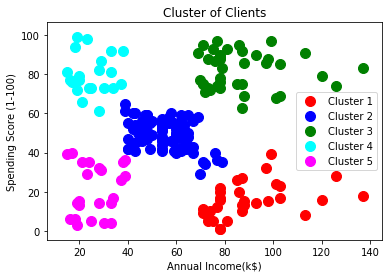

In [57]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0, 1], s = 100 , c = "red", label = "Cluster 1")
plt.scatter(X[y_hc == 1,0], X[y_hc == 1, 1], s = 100 , c = "blue", label = "Cluster 2")
plt.scatter(X[y_hc == 2,0], X[y_hc == 2, 1], s = 100 , c = "green", label = "Cluster 3")
plt.scatter(X[y_hc == 3,0], X[y_hc == 3, 1], s = 100 , c = "cyan", label = "Cluster 4")
plt.scatter(X[y_hc == 4,0], X[y_hc == 4, 1], s = 100 , c = "magenta", label = "Cluster 5")

plt.title("Cluster of Clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()

In [58]:
# can see our data is beautifully divided into 5 cluster.
# ASSUmptions based on Spending score and annual Income
# Cluster1 - "high income and low spending" can say "Careful Customer"
# Cluster2 - "medium income and medium soending" can say "Standard customer"
# cluster 3 - "High Income and High spending" can be "target customer"
# cluster 4 - "Low income and High spending" can say "Careless customer"
# cluster 5 - "low income and low spwnding" can say "Sensible customer"

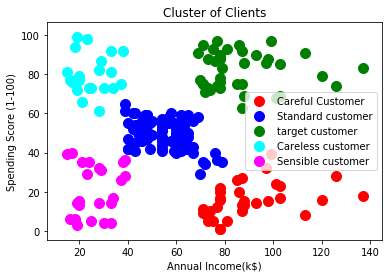

In [59]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0, 1], s = 100 , c = "red", label = "Careful Customer")
plt.scatter(X[y_hc == 1,0], X[y_hc == 1, 1], s = 100 , c = "blue", label = "Standard customer")
plt.scatter(X[y_hc == 2,0], X[y_hc == 2, 1], s = 100 , c = "green", label = "target customer")
plt.scatter(X[y_hc == 3,0], X[y_hc == 3, 1], s = 100 , c = "cyan", label = "Careless customer")
plt.scatter(X[y_hc == 4,0], X[y_hc == 4, 1], s = 100 , c = "magenta", label = "Sensible customer")

plt.title("Cluster of Clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()